In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
import seaborn as sns

The following loads a dataset about customer credit card activity over a six-month period.

In [2]:
credit = pd.read_csv("credit_cards.csv").dropna()
credit

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


The *CUST_ID* column is artificial and of no help in clustering, so we drop it to get the feature matrix.

In [3]:
X = credit.drop("CUST_ID", axis=1)

# 1 (6.3)
Fit `X` to a pipeline called `km` with a standardization preprocessor and $k$-means with 3 clusters, 2 initializations, and random state equal to 302. 

In [ ]:
km = None   # should be a Pipeline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

km = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=3, n_init=2, random_state=302)
)

km.fit(X)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, n_init=2, random_state=302))])

In [6]:
print("Cluster centers found at:")
print(km[1].cluster_centers_)

Cluster centers found at:
[[ 0.3097055   0.42009215  1.51389967  1.26566146  1.25288833 -0.24748966
   1.13351947  1.5391694   0.95942892 -0.36192217 -0.2530327   1.67199215
   0.89065344  0.82644333  0.15977962  0.46660828  0.29523949]
 [-0.37056015 -0.17025826 -0.23287343 -0.20420701 -0.17518796 -0.31342283
  -0.05756376 -0.2325043  -0.0468098  -0.33787972 -0.30237464 -0.24450344
  -0.3427334  -0.28812679 -0.13974587  0.01712138 -0.0237594 ]
 [ 1.1429448   0.31135642 -0.29700692 -0.21282525 -0.31116569  1.35876455
  -0.65775408 -0.31782981 -0.56386467  1.53799336  1.3218475  -0.37531915
   0.59213672  0.43800159  0.39794925 -0.42291038 -0.13864385]]


In [5]:
# TESTS
from sklearn.pipeline import Pipeline
assert type(km) == Pipeline, "Need to use a pipeline"
assert np.isclose(km[1].inertia_, 108086, rtol=1e-3)
print("OK")

OK


# 2 (6.3)
Make a box plot showing the silhouette values for `km` by cluster for all the samples. (You should see one OK-ish cluster with mostly positive values and two rather bad clusters.)

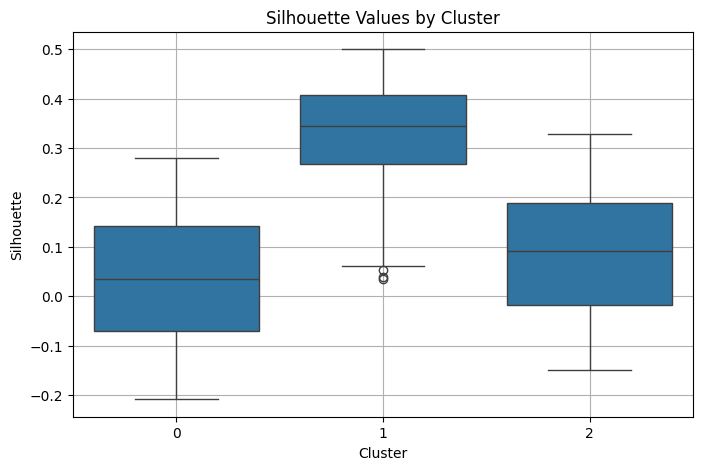

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

labels = km.named_steps['kmeans'].labels_

X_scaled = km.named_steps['standardscaler'].transform(X)

silhouette_vals = silhouette_samples(X_scaled, labels, metric='euclidean')

silhouette_df = pd.DataFrame({
    'Silhouette': silhouette_vals,
    'Cluster': labels
})

plt.figure(figsize=(8, 5))
sns.boxplot(data=silhouette_df, x='Cluster', y='Silhouette')
plt.title("Silhouette Values by Cluster")
plt.grid(True)
plt.show()


# 3 

One reason for the poor clustering performance above is that many of the columns of `X` are extremely left-skewed, as you can see along the diagonal of this pairwise plot:

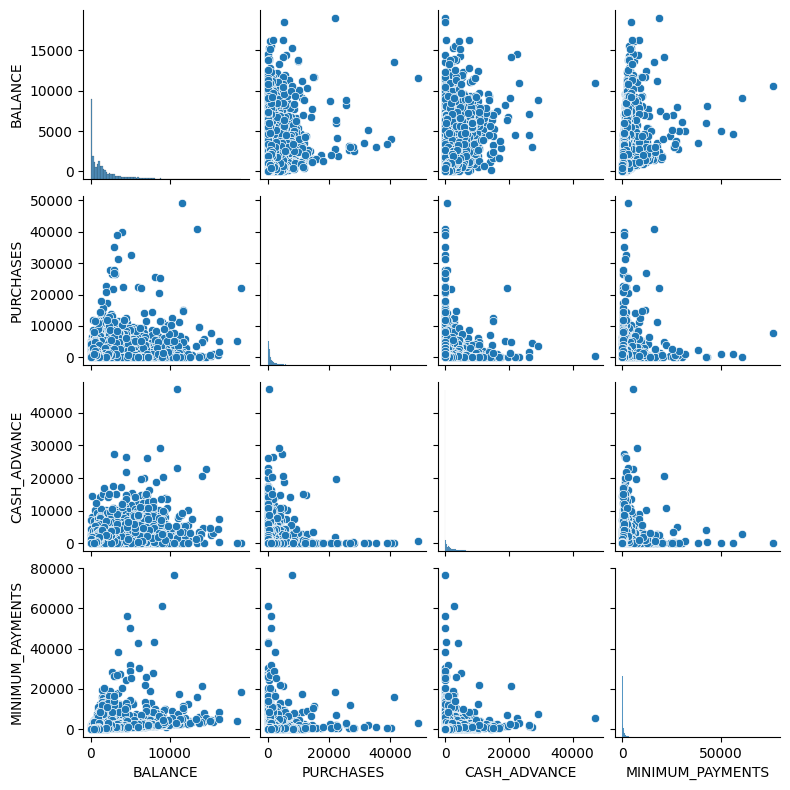

In [9]:
cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "MINIMUM_PAYMENTS"]
sns.pairplot(X[cols], height=2);

(Always plot your data!) Since the data values are nonnegative, we can combat the skewness by transforming the features according to
$$
f(x) = \ln(1 + x).
$$
Let `XL` be a new frame defined by applying $f$ to each column of `X`. (Use `np.log` for the log function.)

In [ ]:
XL = None

XL = np.log(1 + X)

XL = pd.DataFrame(XL, columns=X.columns)

XL.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949
5,7.501540,0.693147,7.196147,0.000000,7.196147,0.000000,0.510826,0.000000,0.459532,0.000000,0.000000,2.197225,7.496097,7.244983,7.786654,0.000000,2.564949


The following new plot should show more-symmetric distributions on the diagonal.

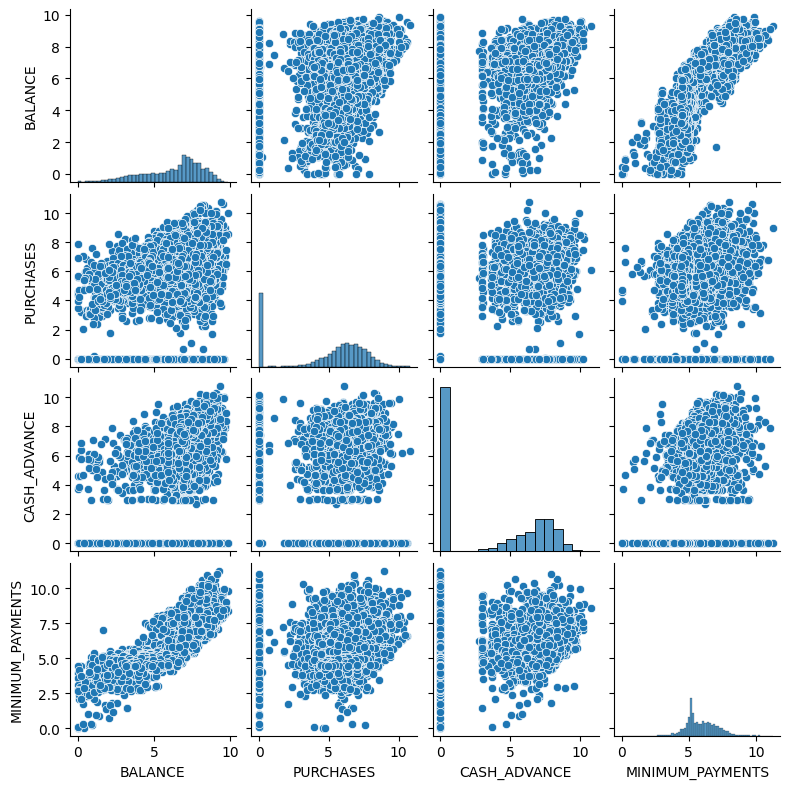

In [11]:
sns.pairplot(XL[cols], height=2);

In [12]:
# TESTS
assert np.isclose(XL["BALANCE"].mean(), 6.265737)
assert np.isclose(XL["PURCHASES_FREQUENCY"].median(), 0.405465)
assert set(X.columns) == set(XL.columns)
print("OK")

OK


# 4 (6.3)
Repeat steps 1 and 2 using `XL` in place of `X`. (Your plot should show one good cluster and two that are just OK.)

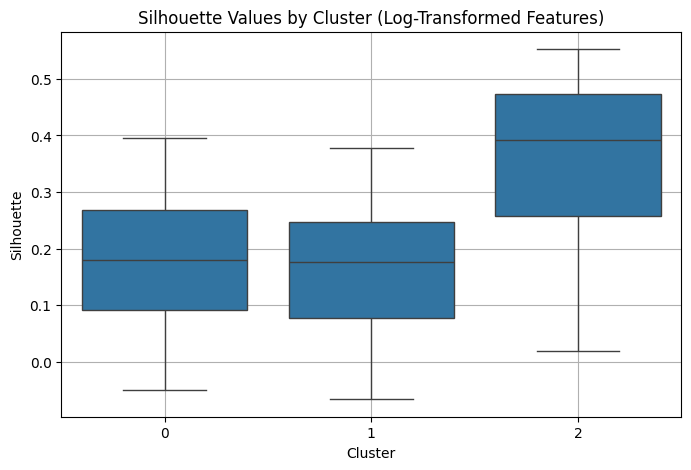

In [ ]:
# Result should be a plot
km = None   # should be a Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

kmL = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=3, n_init=2, random_state=302)
)
kmL.fit(XL)

labels_L = kmL.named_steps['kmeans'].labels_
XL_scaled = kmL.named_steps['standardscaler'].transform(XL)
silhouette_vals_L = silhouette_samples(XL_scaled, labels_L, metric='euclidean')

silhouette_df_L = pd.DataFrame({
    'Silhouette': silhouette_vals_L,
    'Cluster': labels_L
})

plt.figure(figsize=(8, 5))
sns.boxplot(data=silhouette_df_L, x='Cluster', y='Silhouette')
plt.title("Silhouette Values by Cluster (Log-Transformed Features)")
plt.grid(True)
plt.show()


# 5 (6.3)
For each value $k=2,3,\dots,7$, fit `XL` to a pipeline with standardization and $k$-means clustering with 3 initializations and random state 19716. Compute and record the mean silhouette score for the fit. 

Make a series indexed by $k$ called *results* for the mean silhouette scores. (The results should indicate that there is no justification for going past $k=2$.)

In [25]:
XL = np.log1p(X + 1e-3)
XL = pd.DataFrame(XL, columns=X.columns)


In [26]:
results = None 

results = {}

for k in range(2, 8):
    pipeline = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=k, n_init=3, random_state=19716)
    )
    pipeline.fit(XL)
    labels = pipeline.named_steps['kmeans'].labels_
    X_scaled = pipeline.named_steps['standardscaler'].transform(XL)
    score = silhouette_score(X_scaled, labels)
    results[k] = score

results = pd.Series(results)



In [27]:
print(results)

2    0.259906
3    0.231692
4    0.219110
5    0.227115
6    0.230766
7    0.230924
dtype: float64


In [28]:
# TESTS
assert type(results) == pd.Series, "Result must be a series"
assert all(results.index == [2, 3, 4, 5, 6, 7]), "Must be indexed by the number of clusters"
assert np.all( results[2] > results.loc[3:8] ), "Results are incorrect"
assert np.all( 0.38 > results ), "Results are incorrect"
assert np.all( 0.24 < results ), "Results are incorrect"
print("OK")

AssertionError: Results are incorrect